audio file

In [8]:
import pandas as pd
import IPython
import soundfile as sf
import sounddevice as sd
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import torch
import torchaudio
import librosa
import torchaudio.transforms as T
from transformers import Wav2Vec2Model, Wav2Vec2FeatureExtractor
from pyAudioAnalysis import audioBasicIO
#from pyAudioAnalysis import audioFeatureExtraction #not importing

Duration: 27.64


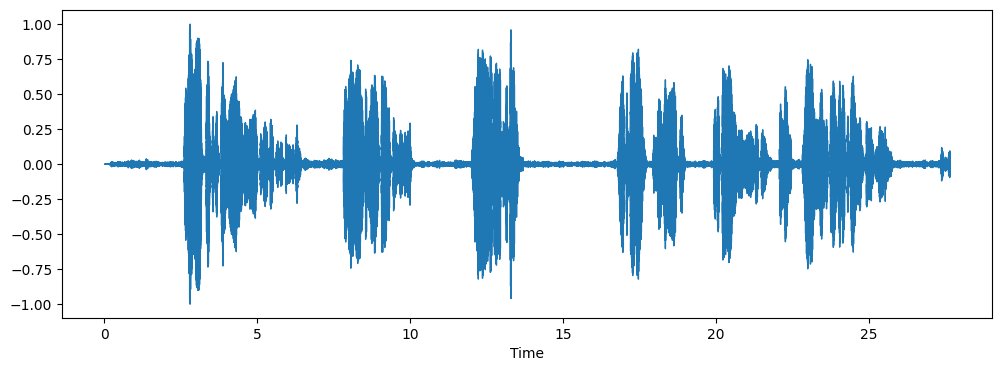

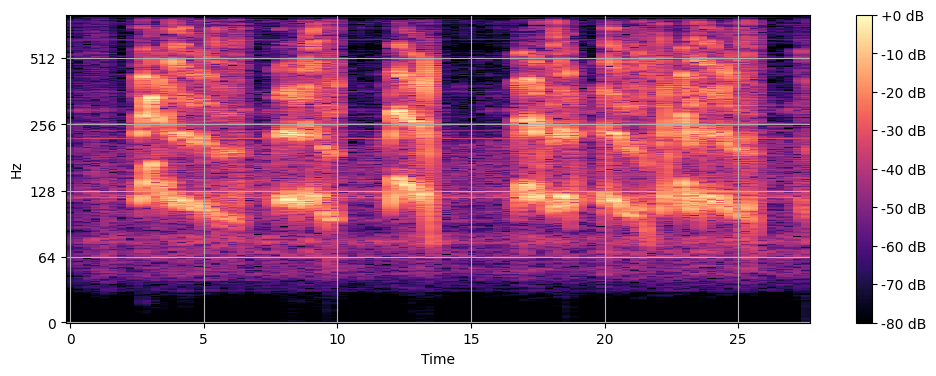

In [9]:
toyaudio = "recording-20250425-213520.wav"


y, sr = librosa.load(toyaudio, sr=1600)
y = librosa.util.normalize(y)

duration = librosa.get_duration(y=y, sr=sr)
print(f"Duration: {duration:.2f}")

#waveform
plt.figure(figsize=(12, 4))
librosa.display.waveshow(y, sr=sr)
plt.show()

#spectrogram
plt.figure(figsize=(12, 4))
D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
librosa.display.specshow(D, sr=sr, x_axis="time", y_axis="log")
plt.colorbar(format="%+2.0f dB")
plt.grid()
plt.show()


now some attempts at acoustic unit discovery

https://github.com/facebookresearch/fairseq/tree/main/examples/wav2vec#wav2vec-20

In [10]:
# Load pretrained model (multilingual recommended)
feature_extractor = Wav2Vec2FeatureExtractor.from_pretrained("facebook/wav2vec2-large-xlsr-53")
model = Wav2Vec2Model.from_pretrained("facebook/wav2vec2-large-xlsr-53")

# Load and preprocess audio
speech_array, sampling_rate = torchaudio.load("recording-20250425-213520.wav")
inputs = feature_extractor(speech_array, sampling_rate="16000", return_tensors="pt", padding=True)

# Extract embeddings
with torch.no_grad():
    outputs = model(**inputs)
    embeddings = outputs.last_hidden_state.squeeze(0)  # Shape: (time_steps, hidden_dim)

ValueError: The model corresponding to this feature extractor: Wav2Vec2FeatureExtractor {
  "do_normalize": true,
  "feature_extractor_type": "Wav2Vec2FeatureExtractor",
  "feature_size": 1,
  "padding_side": "right",
  "padding_value": 0,
  "return_attention_mask": true,
  "sampling_rate": 16000
}
 was trained using a sampling rate of 16000. Please make sure that the provided `raw_speech` input was sampled with 16000 and not 16000.